In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add to the list of cities
    if city not in cities:
        cities.append(city)
# Print the city count to determine sufficient count
len(cities)

602

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    


Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | zadar
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | manono
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | rognan
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | sernur
Processing Record 20 of Set 1 | lamu
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | kloulklubed
Processing Record 23 of Set 1 | naliya
Processing Record 24 of Set 1 | kavara

Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | rio gallegos
Processing Record 47 of Set 4 | san jose
Processing Record 48 of Set 4 | sabang
Processing Record 49 of Set 4 | stepnoye
Processing Record 50 of Set 4 | karaton
Processing Record 1 of Set 5 | iskilip
Processing Record 2 of Set 5 | kirovskiy
Processing Record 3 of Set 5 | berdigestyakh
Processing Record 4 of Set 5 | gasan
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | verkhnedneprovskiy
Processing Record 7 of Set 5 | maromitsa
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | spring valley
Processing Record 10 of Set 5 | burns lake
Processing Record 11 of Set 5 | kruisfontein
Processing Record 12 of Set 5 | surt
Processing Record 13 of Set 5 | pozo colorado
Processing Record 14 of Set 5 | teahupoo
Processing Record 15 of Set 5 | tuy hoa
Processing Record 16 of Set 5 | b

Processing Record 26 of Set 8 | gritsovskiy
Processing Record 27 of Set 8 | gamboula
Processing Record 28 of Set 8 | matagami
Processing Record 29 of Set 8 | parabel
Processing Record 30 of Set 8 | neuquen
Processing Record 31 of Set 8 | shangrao
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | camacha
Processing Record 34 of Set 8 | wawa
Processing Record 35 of Set 8 | bima
Processing Record 36 of Set 8 | taft
Processing Record 37 of Set 8 | hualmay
Processing Record 38 of Set 8 | ust-omchug
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | aklavik
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | strathmore
Processing Record 43 of Set 8 | synya
Processing Record 44 of Set 8 | bodrum
Processing Record 45 of Set 8 | hunza
City not found. Skipping...
Processing Record 46 of Set 8 | puerto el triunfo
Processing Record 47 of Set 8 | polignano a mare
Processing Record 48 of Set 8 | ust-kan
Processing Record 49 of Set 8 | vanga

Processing Record 16 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 17 of Set 12 | aripuana
Processing Record 18 of Set 12 | jardim
Processing Record 19 of Set 12 | znamenskoye
Processing Record 20 of Set 12 | husavik
Processing Record 21 of Set 12 | the valley
Processing Record 22 of Set 12 | antalaha
Processing Record 23 of Set 12 | kapuskasing
Processing Record 24 of Set 12 | brzeziny
Processing Record 25 of Set 12 | chapadinha
Processing Record 26 of Set 12 | edd
Processing Record 27 of Set 12 | santa luzia
Processing Record 28 of Set 12 | morant bay
Processing Record 29 of Set 12 | mbekenyera
Processing Record 30 of Set 12 | havre-saint-pierre
Processing Record 31 of Set 12 | tanout
Processing Record 32 of Set 12 | bozoum
Processing Record 33 of Set 12 | juba
Processing Record 34 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 35 of Set 12 | high prairie
Processing Record 36 of Set 12 | san luis
Processing Record 37 of Set 12 | sayyan
Proce

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,53.46,70,100,9.22,AU,2022-04-05 15:10:37
1,Qaanaaq,77.4840,-69.3632,16.45,90,91,2.17,GL,2022-04-05 15:10:37
2,Ushuaia,-54.8000,-68.3000,38.86,87,75,31.07,AR,2022-04-05 15:10:37
3,Ostrovnoy,68.0531,39.5131,22.82,89,100,13.38,RU,2022-04-05 15:10:38
4,Castro,-24.7911,-50.0119,77.56,60,25,4.52,BR,2022-04-05 15:10:38
5,Punta Arenas,-53.1500,-70.9167,44.71,57,40,20.71,CL,2022-04-05 15:10:38
6,Bluff,-46.6000,168.3333,54.97,76,100,28.30,NZ,2022-04-05 15:10:39
7,Torbay,47.6666,-52.7314,40.75,94,100,5.75,CA,2022-04-05 15:10:39
8,Rikitea,-23.1203,-134.9692,78.31,68,5,18.81,PF,2022-04-05 15:10:39
9,Zadar,44.1197,15.2422,57.81,54,40,12.66,HR,2022-04-05 15:10:40


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-04-05 15:10:37,-42.8794,147.3294,53.46,70,100,9.22
1,Qaanaaq,GL,2022-04-05 15:10:37,77.4840,-69.3632,16.45,90,91,2.17
2,Ushuaia,AR,2022-04-05 15:10:37,-54.8000,-68.3000,38.86,87,75,31.07
3,Ostrovnoy,RU,2022-04-05 15:10:38,68.0531,39.5131,22.82,89,100,13.38
4,Castro,BR,2022-04-05 15:10:38,-24.7911,-50.0119,77.56,60,25,4.52
5,Punta Arenas,CL,2022-04-05 15:10:38,-53.1500,-70.9167,44.71,57,40,20.71
6,Bluff,NZ,2022-04-05 15:10:39,-46.6000,168.3333,54.97,76,100,28.30
7,Torbay,CA,2022-04-05 15:10:39,47.6666,-52.7314,40.75,94,100,5.75
8,Rikitea,PF,2022-04-05 15:10:39,-23.1203,-134.9692,78.31,68,5,18.81
9,Zadar,HR,2022-04-05 15:10:40,44.1197,15.2422,57.81,54,40,12.66


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

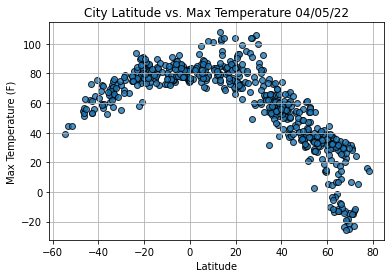

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

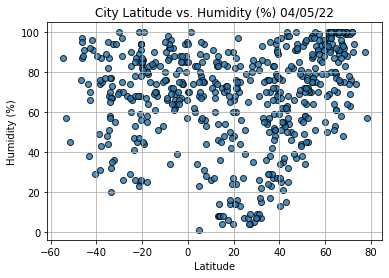

In [17]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

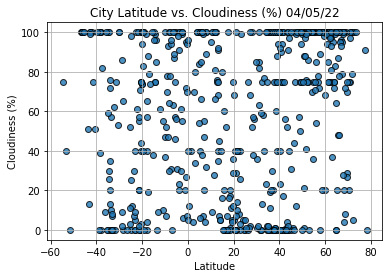

In [18]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

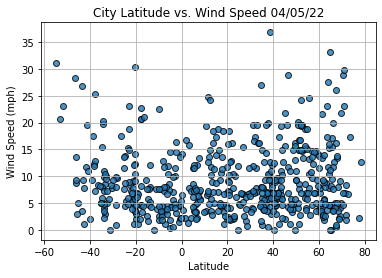

In [19]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()